# Dirichlet boundary conditions

In [22]:
# This line imports [pv][dnm][cf] variables denoting the corresponding data
# p = pressure
# v = velocity
# d = Dirichlet boundary conditions
# n = Neumann boundary conditions
# m = mixed boundary conditions
# c = circle
# f = 7 arm flower
include("data.jl");

In [28]:
using LaTeXStrings
import PyPlot
plt = PyPlot
plt.svg(true)

function subplot_results(x,y,subidx)
    fontd = Dict("family"=>"cmu serif", "size"=>18)
    points = ["x","s","^"]
    lines = ["-","--","-."]
    colours = ["r","g","b"]
    norms = ["\\infty","2", "1"]
    norm_labels = [LaTeXString("\$\\|\\cdot\\|_$(norm_type)}\$") for norm_type in norms]
    ylabels = []
    logx = log2(x)
    ax = plt.subplot(subidx)
    for i in 1:size(y,2)
        logy = log2(y[:,i])
        plt.scatter(logx,logy,marker=points[i],color=colours[i])
    end
    
    for i in 1:size(y,2)
        logy = log2(y[:,i])
        a,b = linreg(logx, logy)
        plt.plot(logx,b*logx + a, "$(colours[i])$(lines[i])")
        plt.xlabel("")
        order = @sprintf("%4.2f",-b)
        push!(ylabels, LaTeXString(string("order = $order")))
        #plt.figtext(0.145, 0.2822*(3-i) + 0.12, "slope = $(round(b,2))")
        #plt.figtext(0.145, 0.2822*(3-i) + 0.16, "R = $(round(cor(logx,logy),2))")
    end
    box = ax[:get_position]()
    ax[:set_position]([box[:x0], box[:y0], box[:width]*0.7, box[:height]])
    plt.legend(vcat(ylabels,norm_labels), loc="upper left",frameon=false,bbox_to_anchor=(1, 1.05),prop=fontd)
    ax
end

function plot_results(x,y1,y2)
    ax1 = subplot_results(x,y1,211)
    plt.ylabel("\$\\|\\mathbf{p} - \\mathbf{p}_h\\|\$", fontsize=18);
    plt.setp(ax1[:get_xticklabels](), visible=false);

    ax2 = subplot_results(x,y2,212)
    plt.ylabel("\$\\|\\mathbf{v} - \\mathbf{v}_h\\|\$", fontsize=18)
    x_ticks = [LaTeXString("$(Int32(i))\$\\mathregular{^2}\$") for i in x];
    plt.xticks(log2(x), x_ticks)
    plt.xlabel(L"$\Delta x$", fontsize=18)
    
    for tick in ax2[:xaxis][:get_major_ticks]()
        tick[:label][:set_fontsize](10)
    end
    for ax in [ax1, ax2]
        for tick in ax[:yaxis][:get_major_ticks]()
            tick[:label][:set_fontsize](10)
        end
    end
end;

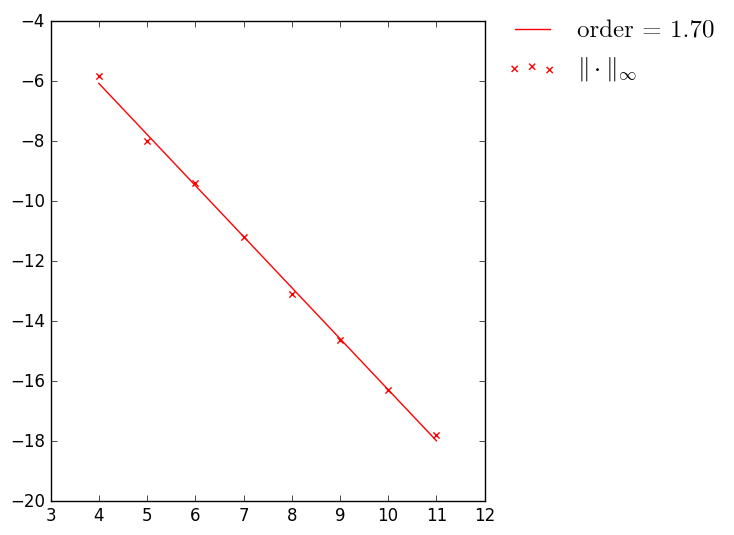

PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x3204cff10>

In [30]:
subplot_results(h[1:end-1],misc,111)

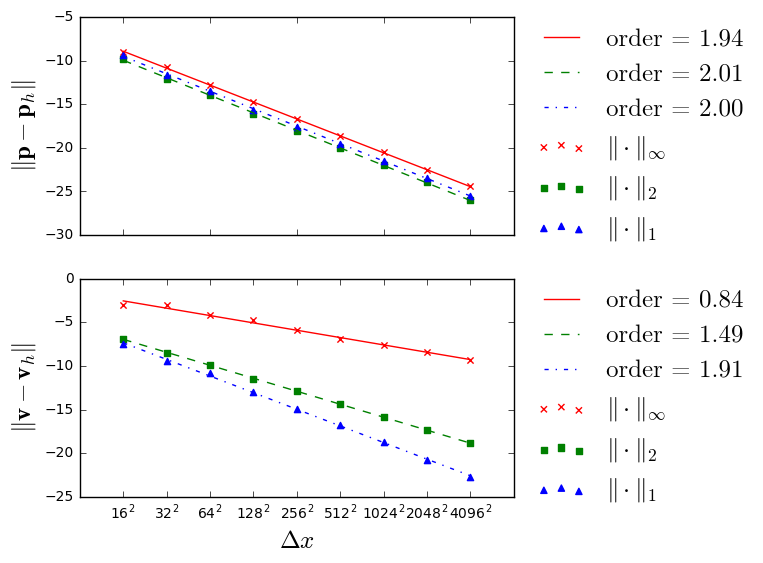

In [21]:
plot_results(h,pdc,vdc)
plt.savefig("dirichlet_circle.pdf");

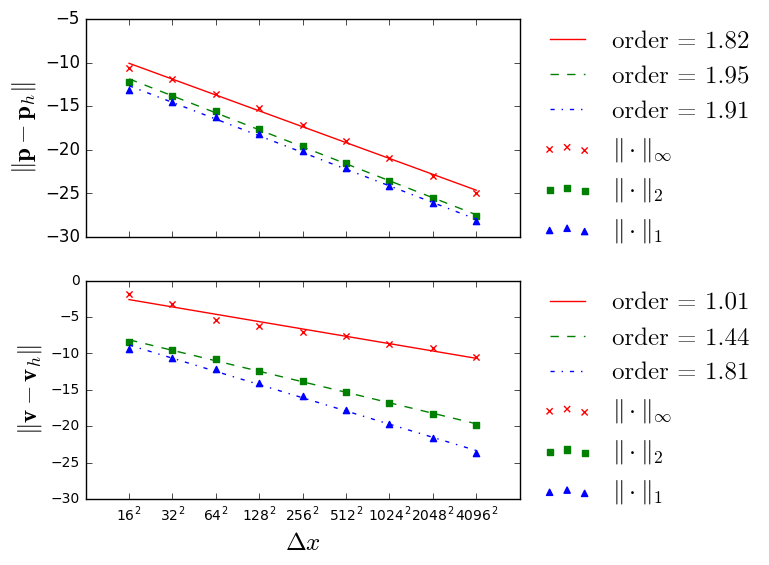

In [84]:
plot_results(h,pdf,vdf)
plt.savefig("dirichlet_flower.pdf");

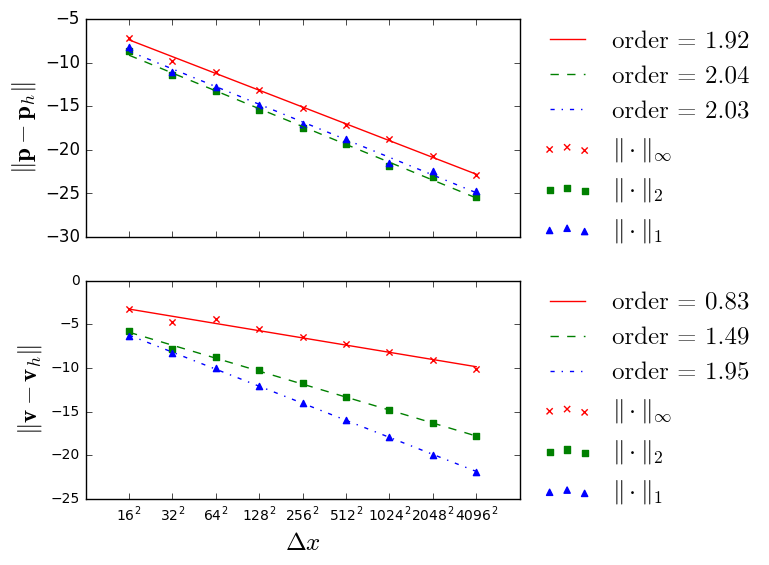

In [85]:
plot_results(h,pnc,vnc)
plt.savefig("neumann_circle.pdf");

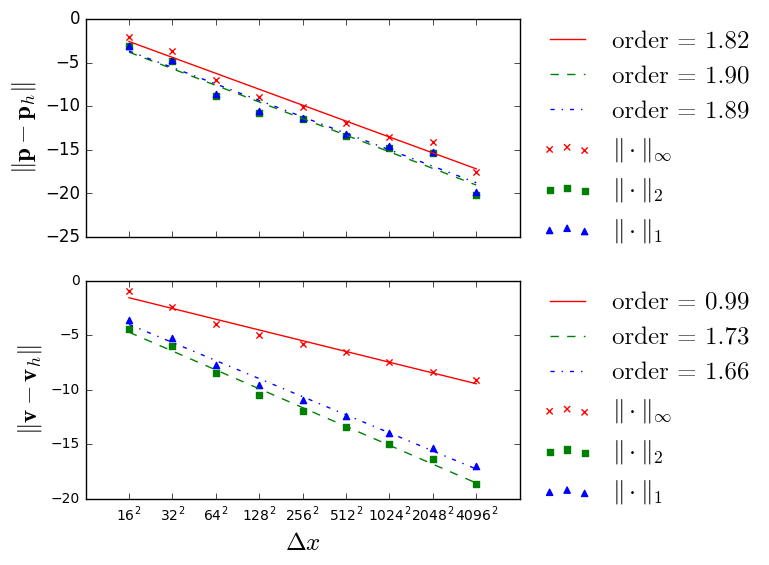

In [86]:
plot_results(h,pnf,vnf)
plt.savefig("neumann_flower.pdf");

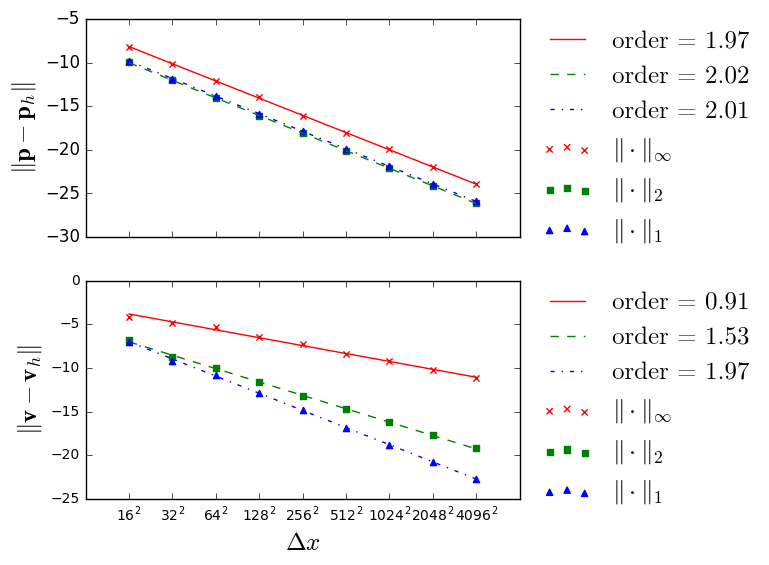

In [87]:
plot_results(h,pmc,vmc)
plt.savefig("mixed_circle.pdf");

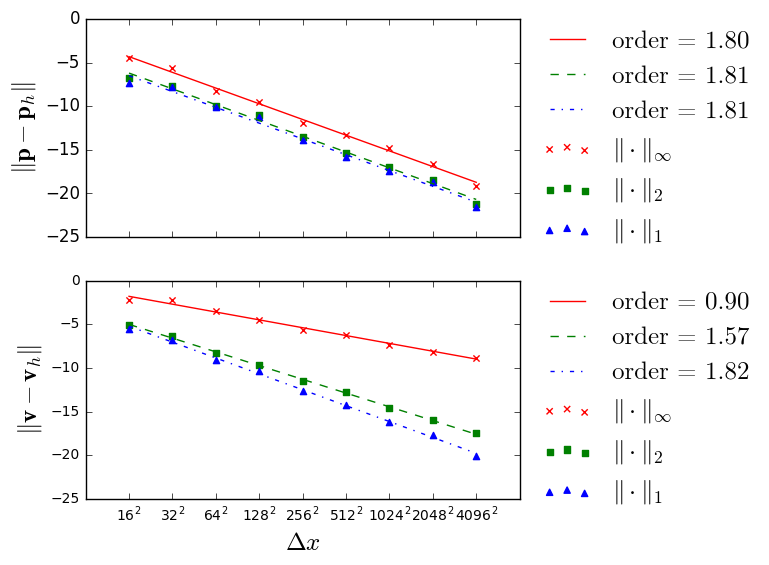

In [88]:
plot_results(h,pmf,vmf)
plt.savefig("mixed_flower.pdf");